In [28]:
import pandas as pd
import scipy
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [29]:
wine_data = pd.read_csv("data/wine.data")

Summan av alla x där x är en alkohol halt i tabelen för en specific druva delat på antalet x utycket som n
$$ \overline x = \frac {\sum x } n$$
___
Roten ut summan av all x där x är en alkohol halt i tabelen för en specifik druva plus medlevärdet för en druv sort upphöjt med 2, delat på n där n är antalet rader för en specifik druva.
$$ s = \sqrt{\frac{\sum(x + \overline x)^2} n} $$

In [30]:
grape_1_Alcohol = wine_data["Alcohol"].loc[1]
grape_2_Alcohol = wine_data["Alcohol"].loc[2]
grape_3_Alcohol = wine_data["Alcohol"].loc[3]

grape_1_Alc_mean = grape_1_Alcohol.mean()
grape_2_Alc_mean = grape_2_Alcohol.mean()
grape_3_Alc_mean = grape_3_Alcohol.mean()

grape_1_standard_deviation = grape_1_Alcohol.std()
grape_2_standard_deviation = grape_2_Alcohol.std()
grape_3_standard_deviation = grape_3_Alcohol.std()

print(f"Druva 1: medelvärde = {grape_1_Alc_mean} standard avvikelse = {grape_1_standard_deviation}")
print(f"Druva 2: medelvärde = {grape_2_Alc_mean} standard avvikelse = {grape_2_standard_deviation}")
print(f"Druva 3: medelvärde = {grape_3_Alc_mean} standard avvikelse = {grape_3_standard_deviation}")

Druva 1: medelvärde = 13.744745762711865 standard avvikelse = 0.46212535966129437
Druva 2: medelvärde = 12.278732394366195 standard avvikelse = 0.5379642302964676
Druva 3: medelvärde = 13.153750000000002 standard avvikelse = 0.5302413139918747


TypeError: bar() missing 1 required positional argument: 'height'

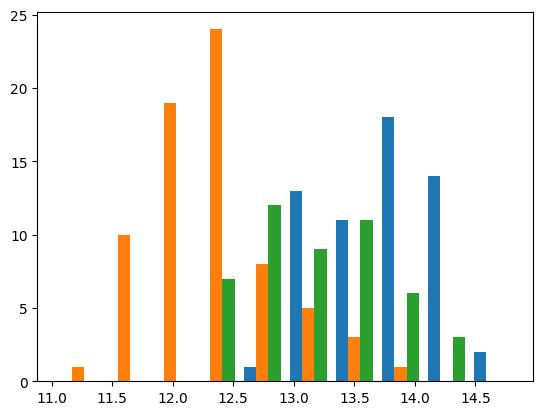

In [52]:
fig = plt.hist([grape_1_Alcohol, grape_2_Alcohol, grape_3_Alcohol])
plt.bar()
plt.title("The Alcohol level per grape")
plt.legend(["Grape1", "Grape2", "Grape3"])
